<a href="https://colab.research.google.com/github/Raphdevv/Analysis-diabetes/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf6b56b710>,
      dtype=object)

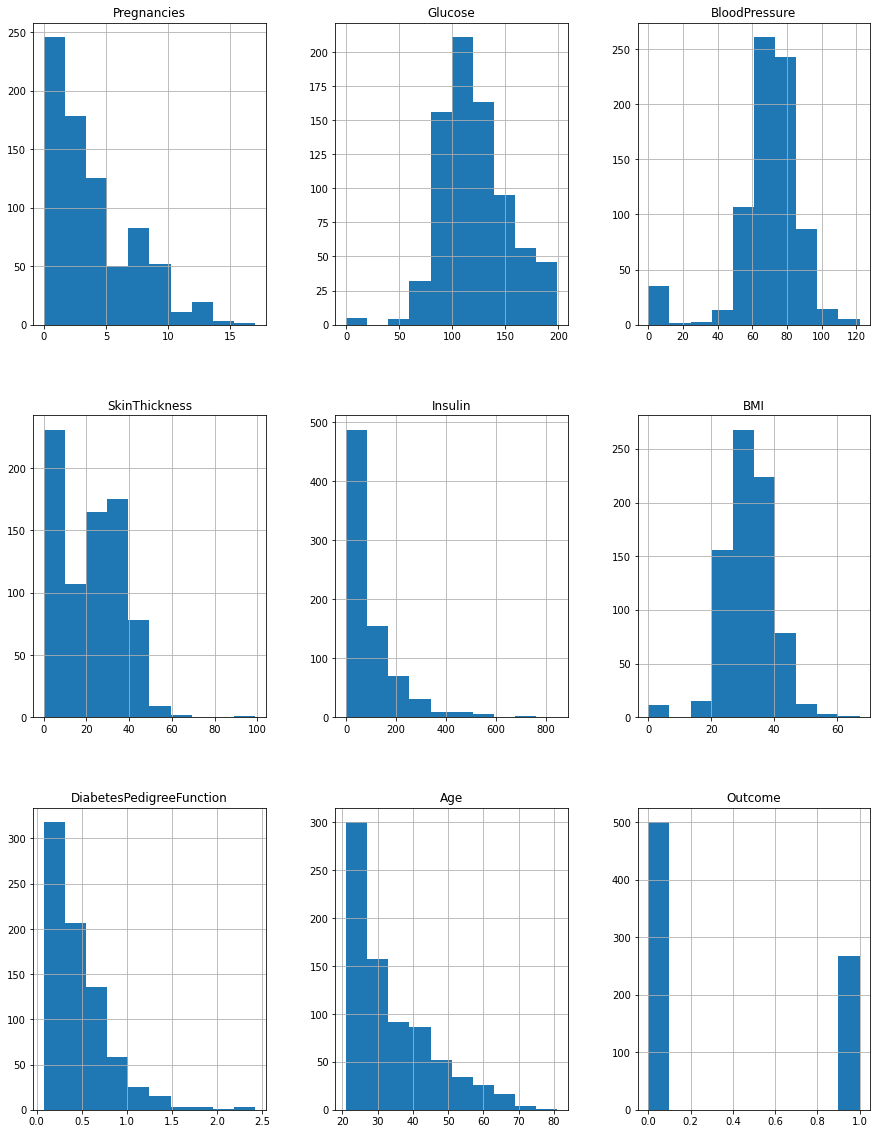

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf6b07dd10>,
      dtype=object)

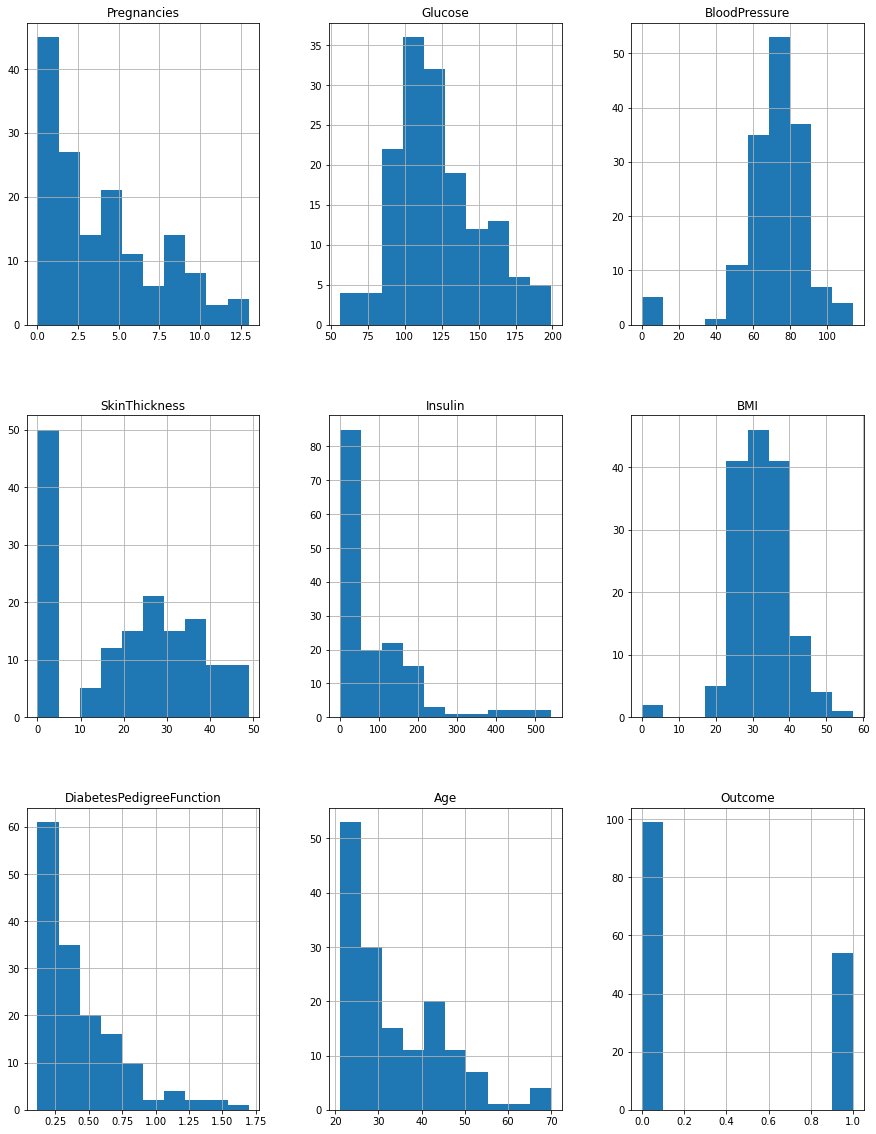

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df[615:].hist(ax = ax)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data = df.values

In [ ]:
d = len(data)-((len(data)*20)//100)
d

615

In [ ]:
X_train = data[:d ,:-1]
Y_train = data[:d ,-1:]

X_test = data[d: ,:-1]
Y_test = data[d: ,-1:]

In [ ]:
X_train

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  7.   , 168.   ,  88.   , ...,  38.2  ,   0.787,  40.   ],
       [  6.   , 105.   ,  80.   , ...,  32.5  ,   0.878,  26.   ],
       [ 11.   , 138.   ,  74.   , ...,  36.1  ,   0.557,  50.   ]])

In [ ]:
Y_test.shape

(153, 1)

In [ ]:
svm = svm.SVC()

In [ ]:
svm.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [ ]:
knn.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [ ]:
Y_pred_knn = knn.predict(X_test)
Y_pred_svm = svm.predict(X_test)

In [ ]:
con_m_knn = confusion_matrix(Y_test, Y_pred_knn)
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_pred_knn, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.73      0.86      0.79        99
     class 1       0.61      0.41      0.49        54

    accuracy                           0.70       153
   macro avg       0.67      0.63      0.64       153
weighted avg       0.69      0.70      0.68       153



In [ ]:
con_m_svm = confusion_matrix(Y_test, Y_pred_svm)
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_pred_svm, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.76      0.89      0.82        99
     class 1       0.70      0.48      0.57        54

    accuracy                           0.75       153
   macro avg       0.73      0.69      0.70       153
weighted avg       0.74      0.75      0.73       153



In [ ]:
y = [0.70*100,0.48*100,0.75*100,0.57*100]
x=[1,2,3,4]
label = ["Precision","Recall","Accuracy","F1-score"]
ax = plt.gca(xticks=x)
ax.set_xticklabels(label,rotation=10)
plt.title("Linear SVM")
plt.bar(x,y)
for i in range(len(x)):
    plt.annotate(str(y[i]), xy=(x[i],y[i]), ha='center', va='bottom')
plt.show()

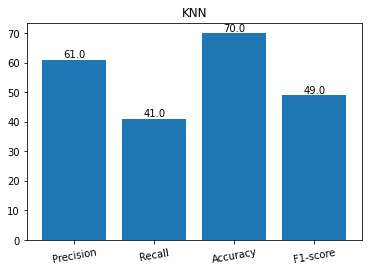

In [ ]:
y = [0.61*100,0.41*100,0.70*100,0.49*100]
x=[1,2,3,4]
label = ["Precision","Recall","Accuracy","F1-score"]
ax = plt.gca(xticks=x)
ax.set_xticklabels(label,rotation=10)
plt.title("KNN")
plt.bar(x,y)
for i in range(len(x)):
    plt.annotate(str(y[i]), xy=(x[i],y[i]), ha='center', va='bottom')
plt.show()

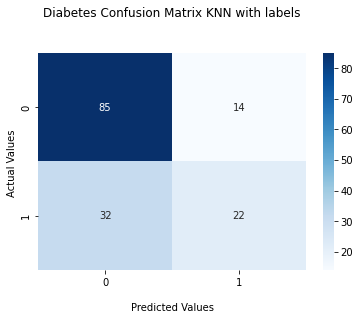

In [ ]:
ax = sns.heatmap(con_m_knn, annot=True, cmap='Blues')

ax.set_title('Diabetes Confusion Matrix KNN with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

plt.show()

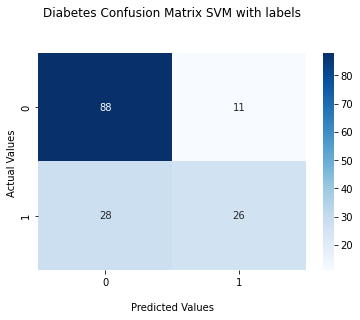

In [ ]:
ax = sns.heatmap(con_m_svm, annot=True, cmap='Blues')

ax.set_title('Diabetes Confusion Matrix SVM with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

plt.show()